# House Prices: A simple two variable model
After performing [feature selection using Boruta-SHAP](https://www.kaggle.com/carlmcbrideellis/feature-selection-using-borutashap) the two most influential features in the [House Prices dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) were deemed to be `OverallQual` and `GrLivArea`.
Here we shall use these two features to produce a very simple model.

In [1]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
#===========================================================================
# read in the data
#===========================================================================
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data  = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

#===========================================================================
# select the two most important features from Boruta-SHAP
#===========================================================================
features = ['OverallQual' , 'GrLivArea']

X_train = train_data[features]
y_train = train_data["SalePrice"]
X_test  = test_data[features]

## OverallQual
First we shall make a simple fit to the `OverallQual` variable. I have studied this variable before in my notebook ["House Prices: my score using only 'OverallQual'"](https://www.kaggle.com/carlmcbrideellis/house-prices-my-score-using-only-overallqual) where we arrived at the conclusion that a simple exponential fit $(y = A\exp(Bx))$ was not too bad:

In [3]:
#===========================================================================
# The model for OverallQual
#===========================================================================
fit = (np.polyfit(X_train['OverallQual'], np.log(y_train), 1))
A = np.exp(fit[1])
B = fit[0]
OverallQual_fit = (A*np.exp(B*X_test['OverallQual']))

## GrLivArea
For the `GrLivArea` variable we shall go with a fit to a straight line $(y = mx +c)$:

In [4]:
#===========================================================================
# The model for GrLivArea
#===========================================================================
fit = (np.polyfit(X_train['GrLivArea'], y_train, 1 ))
c = fit[1]
m = fit[0]
GrLivArea_fit = (m*X_test['GrLivArea'] + c)

## Plots
Let us take a look at the training data along with our two fits:

In [5]:
fig_1 = px.scatter(X_train, x=X_train['OverallQual'], y=y_train, marginal_y="violin", marginal_x="box",
                   labels={"x": "OverallQual","y": "SalePrice"},title=("House Prices data"))
x = np.linspace(0,10,20)
y = A*np.exp(B*x)
fig_1.add_scatter(x=x, y=y)
fig_1.show()
fig_2 = px.scatter(X_train, x=X_train['GrLivArea'], y=y_train, marginal_y="violin", marginal_x="box",
                  labels={"x": "GrLivArea","y": "SalePrice"})
x = np.linspace(0,6000,2)
y = m*x + c
fig_2.add_scatter(x=x, y=y)
fig_2.show();

and let us take a look at the two variables together, along with the our fitted `SalePrice` surface, by using an interactive 3D plot (thanks to [Plotly Express](https://plotly.com/python/plotly-express/))

In [6]:
fig = go.Figure()
# scatter plot
fig = px.scatter_3d(x=X_train['OverallQual'],y=X_train['GrLivArea'],z=y_train, 
                    title="House Prices data",
                    labels={"x": "OverallQual","y": "GrLivArea","z": "SalePrice"})
fig.update_traces(marker=dict(size=1.5))
# surface plot
X = np.linspace(0,   10, 20)
Y = np.linspace(0, 6000, 20)
X, Y = np.meshgrid(X, Y)
Z = ((A*np.exp(B*X)) + (m*Y + c))/2.0
fig.add_traces(go.Surface(x=X, y=Y, z=Z, showscale=False, opacity=0.5))
# set the initial camera location
camera = dict(up=dict(x=0, y=0, z=1),center=dict(x=0, y=0, z=0),eye=dict(x=1.3, y=-1.9, z=0.4))
fig.update_layout(scene_camera=camera)
fig.show()

Finally we shall produce a `submission.csv` for this simple two variable model

In [7]:
#===========================================================================
# write out CSV submission file
#===========================================================================
X_test['y_pred'] = (OverallQual_fit + GrLivArea_fit)/2
output = pd.DataFrame({"Id":test_data.Id, "SalePrice":X_test['y_pred']})
output.to_csv('submission.csv', index=False)

giving us a score of 
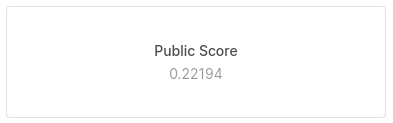